In [1]:
import evaluation

executable = evaluation.ROOT_DIR + "/openmp/bin/multilayer-game-of-life"

grid_size = 512
num_layers = 5
num_steps = 128

params = [str(grid_size), str(num_layers), str(num_steps)]

threads2exec_time = {}

min_parallel_threads = 2
max_parallel_threads = 16
step_parallel_threads = 2
num_threads_list = [1] + list(range(min_parallel_threads, max_parallel_threads + 1, step_parallel_threads))

for num_threads in num_threads_list:
    print(f"Evaluating with {num_threads} threads")
    environment = {"OMP_NUM_THREADS": str(num_threads)}
    threads2exec_time[num_threads] = evaluation.mean_execution_time(executable, params, environment, repetitions=5, cwd=evaluation.ROOT_DIR + "/openmp")

Evaluating with 1 threads
Mean execution time: 25.93 seconds
Evaluating with 2 threads
Mean execution time: 21.45 seconds
Evaluating with 4 threads
Mean execution time: 20.74 seconds
Evaluating with 6 threads
Mean execution time: 20.70 seconds
Evaluating with 8 threads
Mean execution time: 22.15 seconds
Evaluating with 10 threads
Mean execution time: 22.29 seconds
Evaluating with 12 threads
Mean execution time: 22.53 seconds
Evaluating with 14 threads
Mean execution time: 21.86 seconds
Evaluating with 16 threads
Mean execution time: 21.98 seconds


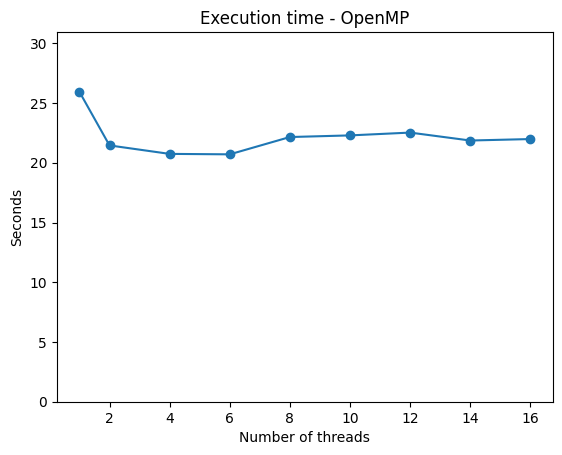

Lowest mean execution time: 20.705 obtained with 6 number of threads.


In [32]:
import matplotlib.pyplot as plt

x = list(threads2exec_time.keys())
y = list(threads2exec_time.values())

# Creating the plot
plt.plot(x, y, marker='o')

# Adding title and labels
plt.title('Execution time - OpenMP')
plt.xlabel('Number of threads')
plt.ylabel('Seconds')
plt.ylim(0, max(y)+5)

# Displaying the plot
plt.show()

print("Lowest mean execution time: {min_time:.3f} obtained with {threads} number of threads."
      .format(min_time = min(y), threads = min(threads2exec_time, key = threads2exec_time.get)))


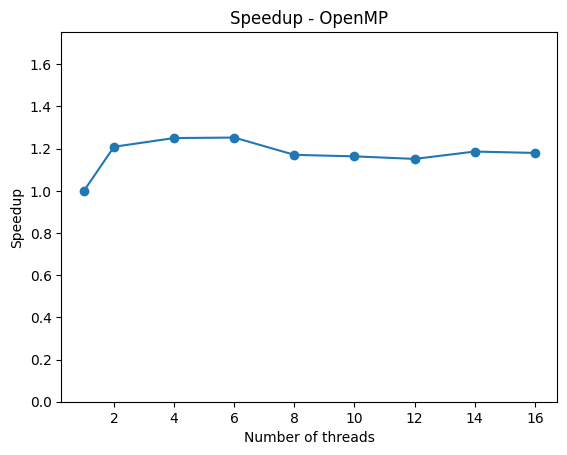

Max speedup: 1.253


In [33]:
x = list(threads2exec_time.keys())
y = [threads2exec_time[1]/value for value in threads2exec_time.values()]

# Creating the plot
plt.plot(x, y, marker='o')

# Adding title and labels
plt.title('Speedup - OpenMP')
plt.xlabel('Number of threads')
plt.ylabel('Speedup')
plt.ylim(0, max(y)+0.5)

# Displaying the plot
plt.show()

print(f"Max speedup: {max(y):.3f}")

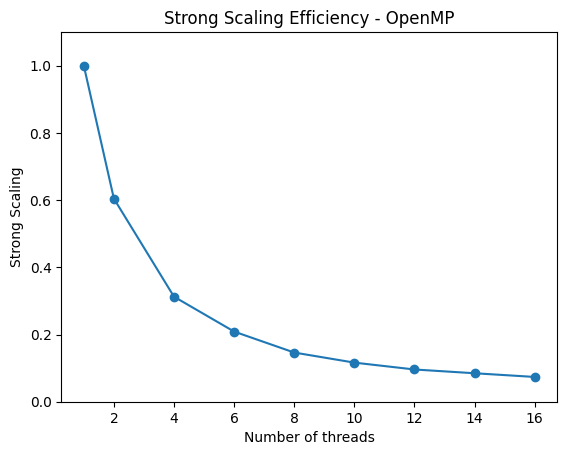

In [14]:
x = list(threads2exec_time.keys())
y = [threads2exec_time[1]/(p*value) for p, value in threads2exec_time.items()]

# Creating the plot
plt.plot(x, y, marker='o')

# Adding title and labels
plt.title('Strong Scaling Efficiency - OpenMP')
plt.xlabel('Number of threads')
plt.ylabel('Strong Scaling')
plt.ylim(0, max(y)+0.1)

# Displaying the plot
plt.show()